# Preprocessing Workflow


🎯 This exercise will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

👇 Download the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) and save it in the `data` folder as `ML_Houses_dataset.csv`. Then, run the code below to load the dataset and features you will be working with.

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


👉 Take the time to do a preliminary investigation of the features by reading the dataset description available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to use refer to it throughout the day.

# Duplicates

ℹ️ Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

❓ How many duplicated rows are there in the dataset? Save your answer under variable name `duplicate_count`.

In [2]:
data_dup = data.drop_duplicates()

duplicate_count = len(data) - len(data_dup)

In [3]:
# YOUR CODE HERE

👇 Remove the duplicates from the dataset. Overwite the dataframe `data`.

In [4]:
# YOUR CODE HERE
data = data.drop_duplicates()

### ☑️ Test your code

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 2 items

tests/test_duplicates.py::TestDuplicates::test_dataset_length PASSED     [ 50%]
tests/test_duplicates.py::TestDuplicates::test_duplicate_count PASSED    [100%]

============================== 2 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master


# Missing data

👇 Print out the percentage of missing values for all columns of the dataframe.

In [6]:
# YOUR CODE HERE

data.isnull().sum().sort_values(ascending=False) #NaN count for each column

data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column


GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

## `GarageFinish`

👇 Investigate the missing values in `GarageFinish`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [7]:
# YOUR CODE HERE

data[data['GarageFinish'].isnull()]



,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
39,1152,2,2,5,2489.0,NaN,N,?,6,82000
48,1452,2,3,5,1252.0,NaN,Y,?,6,113000
78,1768,4,2,5,2203.0,NaN,N,?,4,136500
88,1526,2,1,2,4264.0,NaN,N,?,10,85000
89,990,3,1,5,1440.0,NaN,Y,?,8,123600
...,...,...,...,...,...,...,...,...,...,...
1349,2358,4,1,5,4508.0,NaN,N,?,12,122000
1407,833,3,1,5,773.0,NaN,Y,?,3,112000
1449,630,1,1,7,1344.0,NaN,Y,?,8,92000
1450,1792,4,2,5,3586.0,NaN,Y,?,9,136000


In [8]:
data['GarageFinish'].fillna('No', inplace=True)
#data.GarageFinish.value_counts()

## `RoofSurface`

👇 Investigate the missing values in `RoofSurface`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [9]:
# YOUR CODE HERE

#data[data['RoofSurface'].isnull()]

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['RoofSurface']]) # Call the "fit" method on the object

data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) # Call the "transform" method on the object

imputer.statistics_ # The mean is stored in the transformer's memory

array([2863.20330806])

👇 When you are done, print out the percentage of missing values for the entire dataframe.

In [11]:
# YOUR CODE HERE

data.isnull().sum().sort_values(ascending=False) #NaN count for each column

data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

⚠️ Be careful: not all missing values are represented `np.nans`, and python's `isnull()` only detects `np.nans` ⚠️

## `ChimneyStyle`

👇 Investigate the missing values in `ChimneyStyle`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
</details>

In [12]:
# YOUR CODE HERE

data['ChimneyStyle'].unique()

data[data['ChimneyStyle'] == '?'].count()



GrLivArea       1455
BedroomAbvGr    1455
KitchenAbvGr    1455
OverallCond     1455
RoofSurface     1455
GarageFinish    1455
CentralAir      1455
ChimneyStyle    1455
MoSold          1455
SalePrice       1455
dtype: int64

In [13]:
data.drop(columns='ChimneyStyle', inplace = True)

#data.drop(columns='WallMat', inplace=True)

In [14]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


### ☑️ Test your code

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_nans PASSED       [ 50%]
tests/test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

##  `RoofSurface` 

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

(array([151., 150., 124., 124., 153., 166., 134., 156., 143., 159.]),
 array([ 558. , 1011.7, 1465.4, 1919.1, 2372.8, 2826.5, 3280.2, 3733.9,
        4187.6, 4641.3, 5095. ]),
 <BarContainer object of 10 artists>)

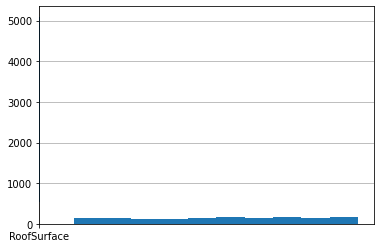

In [16]:
# YOUR CODE HERE

data[['RoofSurface']].boxplot()

import matplotlib.pyplot as plt

plt.hist(data['RoofSurface']) # Check feature distribution

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

In [17]:
# # YOUR CODE HERE

# from sklearn.preprocessing import Normalizer
# import matplotlib.pyplot as plt

# plt.hist(data['RoofSurface']) # Check feature distribution

# normali = Normalizer() # Instanciate StandarScaler

# normali.fit(data[['RoofSurface']]) # Fit scaler to data

# data['RoofSurface'] = normali.transform(data[['RoofSurface']]) # Use scaler to transform data

In [18]:
# YOUR CODE HERE

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instanciate MinMaxScaler
scaler.fit(data[['RoofSurface']]) # Fit scaler to data
scaler.data_max_


data['RoofSurface'] = scaler.transform(data[['RoofSurface']]) # Use scaler to transform data

## `GrLivArea`

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

<AxesSubplot:>

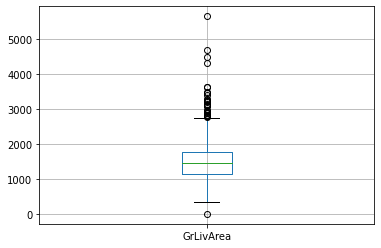

In [19]:
data[['GrLivArea']].boxplot()

<AxesSubplot:>

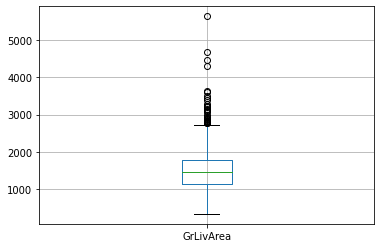

In [20]:
# YOUR CODE HERE

#data[['GrLivArea']].boxplot()

data['GrLivArea'].min()

false_observation = data['GrLivArea'].argmin() # Get index corresponding to minimum value

data = data.drop(false_observation).reset_index(drop=True) # Drop row

data[['GrLivArea']].boxplot() # Visualize boxplot

<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

In [21]:
# YOUR CODE HERE

from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(data[['GrLivArea']]) # Fit scaler to feature

data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) #Scale

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380216,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312210,3,1,8,0.069650,RFn,Y,5,181500
2,0.497682,3,1,5,0.228124,RFn,Y,9,223500
3,0.391036,3,1,5,0.442583,Unf,Y,2,140000
4,1.134467,4,1,5,0.566894,RFn,Y,12,250000


## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scale
2. Standard Scale
3. Robust Scale

Replace the original columns by the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

In [22]:
# # YOUR CODE HERE

# #
# #plt.hist(data['BedroomAbvGr']) # Check feature distribution

# data[['BedroomAbvGr']].min()

# false_observation = data['BedroomAbvGr'].argmin() # Get index corresponding to minimum value

# data = data.drop(false_observation).reset_index(drop=True) # Drop row

# #data[['BedroomAbvGr']].boxplot()

In [23]:
# YOUR CODE HERE

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instanciate MinMaxScaler
scaler.fit(data[['BedroomAbvGr']]) # Fit scaler to data
scaler.data_max_


data['BedroomAbvGr'] = scaler.transform(data[['BedroomAbvGr']]) # Use scaler to transform data

---------------

<AxesSubplot:>

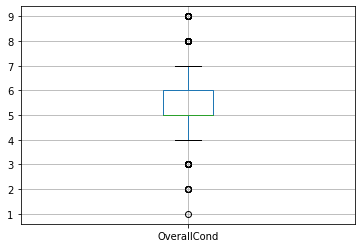

In [24]:
# YOUR CODE HERE

#plt.hist(data['OverallCond']) # Check feature distribution
data[['OverallCond']].boxplot()

In [25]:
# YOUR CODE HERE

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instanciate MinMaxScaler
scaler.fit(data[['OverallCond']]) # Fit scaler to data
scaler.data_max_


data['OverallCond'] = scaler.transform(data[['OverallCond']]) # Use scaler to transform data

--------------------------

<AxesSubplot:>

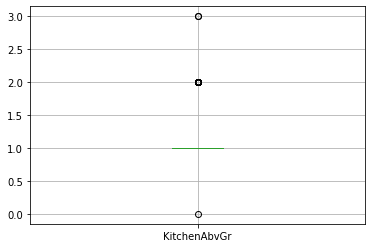

In [26]:
# YOUR CODE HERE

#plt.hist(data['KitchenAbvGr']) # Check feature distribution
data[['KitchenAbvGr']].boxplot()

In [27]:
# # YOUR CODE HERE

# #
# #plt.hist(data['BedroomAbvGr']) # Check feature distribution

# data[['KitchenAbvGr']].min()

# false_observation = data['KitchenAbvGr'].argmin() # Get index corresponding to minimum value

# data = data.drop(false_observation).reset_index(drop=True) # Drop row

In [28]:
# YOUR CODE HERE

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instanciate MinMaxScaler
scaler.fit(data[['KitchenAbvGr']]) # Fit scaler to data
scaler.data_max_


data['KitchenAbvGr'] = scaler.transform(data[['KitchenAbvGr']]) # Use scaler to transform data

### ☑️ Test your code

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Feature Engineering

## `GarageFinish`

👇 Investigate `GarageFinish` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [30]:
# YOUR CODE HERE
data['GarageFinish'].unique()


array(['RFn', 'Unf', 'Fin', 'No'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data.GarageFinish.unique()  # Check unique values for streets (3)

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(data[['GarageFinish']]) # Fit encoder

garage_encoded = ohe.transform(data[['GarageFinish']]) # Encode GarageFinish

data["GarageFinished"],data["GarageRoughFinished"],data['GarageUnfinished'],data['GarageNo'] = garage_encoded.T 
# Transpose encoded GarageFinish back into dataframe

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,GarageFinished,GarageRoughFinished,GarageUnfinished,GarageNo
0,0.380216,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312210,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497682,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,0.0,1.0,0.0
3,0.391036,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134467,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000,0.0,0.0,1.0,0.0


In [32]:
data.drop(columns='GarageFinished', inplace = True)

## Encoding  `CentralAir`

👇 Investigate `CentralAir` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column by the encoding.


<details>
    <summary>💡 Hint</summary>
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [33]:
# YOUR CODE HERE

data.CentralAir.unique()

data['CentralAir'] = np.where(data['CentralAir'] == 'Y', 1,0)

#data.drop(columns='CentralAir', inplace = True)

## `MoSold` - Cyclical engineering 

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

👇 Do your own investigation on how to preprocess cyclical features in Machine Learning. Then, transform `MoSold` according to your findings.

⚠️ Replace the original column by the new features.

<details>
    <summary>💡 Hint</summary>
ℹ️ This <a href='https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time' target='blank'>article</a> explains how to deal with cyclical features.
    
</details>

**❓ How would you name these 2 new features?**

Let's add two new columns to your data frame, `sin_MoSold` and `cos_MoSold`, containing the sine and cosine of the `MoSold` column respectively.  Once these columns are added we can drop the original `MoSold` column.

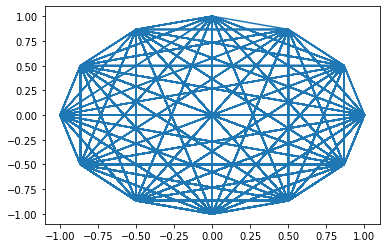

In [34]:
# YOUR CODE HERE

data['sin_MoSold'] = np.sin(2*np.pi*data['MoSold']/12)
data['cos_MoSold'] = np.cos(2*np.pi*data['MoSold']/12)

plt.plot(data['sin_MoSold'], data['cos_MoSold'])

data.drop(columns='MoSold', inplace = True)

### ☑️ Test your code

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_central_air PASSED            [ 25%]
tests/test_encoding.py::TestEncoding::test_columns PASSED                [ 50%]
tests/test_encoding.py::TestEncoding::test_month_sold_features PASSED    [ 75%]
tests/test_encoding.py::TestEncoding::test_month_sold_features_number PASSED [100%]

============================== 4 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


# Export the dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [36]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)

# 🏁